# Assignment 5 - Control Theory (Artem Bakhanov)
I have variant **A** and I used "Artem" as my name and "a.bahanov@innopolis.university" as my email for obtaining the variant.<br/>
From the previous assignment (but numbers are different!!!): 
$$
A = \left[\begin{matrix}0 & 0 & 1 & 0\\0 & 0 & 0 & 1\\0 & \frac{g m}{M} & 0 & 0\\0 & \frac{g \left(M + m\right)}{M l} & 0 & 0\end{matrix}\right] = \left[\begin{matrix}0 & 0 & 1 & 0\\0 & 0 & 0 & 1\\0 & 5.7552 & 0 & 0\\0 & 12.971 & 0 & 0\end{matrix}\right]
$$

$$
B = \left[\begin{matrix}0\\0\\\frac{1}{M}\\\frac{1}{M l}\end{matrix}\right] = \left[\begin{matrix}0\\0\\0.133\\0.111\end{matrix}\right]
$$

In [1]:
import numpy as np

Since we are insterested only in $x$ and $\theta$ we just extract them using C matrix.

In [2]:
A = np.array([ [ 0.    ,  0.    ,  1.    ,  0.    ],
               [ 0.    ,  0.    ,  0.    ,  1.    ],
               [ 0.    ,  5.7552,  0.    ,  0.    ],
               [ 0.    , 12.971 ,  0.    ,  0.    ]])
B = np.array([ [0.        ],
               [0.        ],
               [0.13333333],
               [0.11111111]])
C = np.array([ [ 1.        ,  0.        ,  0.        ,  0.        ],
               [ 0.        ,  1.        ,  0.        ,  0.        ]])

In [3]:
print(C)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]]


## Task A
Let us calculate observability matrix 
$$\Omega = \left[\begin{matrix}C\\CA\\CA^2\\CA^3\end{matrix}\right]$$ and check its rank. It should be $n = 4$.

In [4]:
omega = np.block([[C], [C.dot(A)], [C.dot(A).dot(A)], [C.dot(A).dot(A).dot(A)]])
print(omega)
assert(np.linalg.matrix_rank(omega) == 4)

[[ 1.      0.      0.      0.    ]
 [ 0.      1.      0.      0.    ]
 [ 0.      0.      1.      0.    ]
 [ 0.      0.      0.      1.    ]
 [ 0.      5.7552  0.      0.    ]
 [ 0.     12.971   0.      0.    ]
 [ 0.      0.      0.      5.7552]
 [ 0.      0.      0.     12.971 ]]


No exception! It means that the rank of the matrix is 4 and the system is observable.

## Task B
In the open-loop observer It happens out that it depends on matrix A. Let's look:
$${\dot{x} - \dot{\hat{x}}} = \dot{\tilde{x}} = A(x - \hat{x}) = A \tilde{x}$$
You can find the proof here: https://ocw.mit.edu/courses/aeronautics-and-astronautics/16-30-feedback-control-systems-fall-2010/lecture-notes/MIT16_30F10_lec14.pdf on pages 4-5

In [5]:
np.linalg.eig(A)[0]

array([ 0.        ,  0.        ,  3.60152745, -3.60152745])

The error dynamics for the open-loop observer is not stable, one eigen value is positive.

## Task C

Again, from the source that I meantioned above, we can design Luenberger observer using 2 approaches. The dynamics of the closed-loop observer. 
$$\dot{\tilde{x}} = (A-LC) \tilde{x}$$
We are trying to find L, so the system above is stable and goes to 0. (I do not forget about dual problem!)
### Pole placement
For this part I used scipy library.

In [6]:
from scipy.signal import place_poles
poles = [-1, -1.2, -1.3, -1.4]
L = place_poles(A.T, C.T, poles).gain_matrix.T

np.linalg.eig(A - np.matmul(L, C))[0]

array([-1. , -1.4, -1.2, -1.3])

As you can see, the closed-loop system is now stable, so the observer is working. The solution for this is exponenent so eventually the error will be 0.
$$
L = \begin{bmatrix}
  2.45 & 0.15\\
  0.15 & 2.45\\
  1.49 & 5.9452\\
  0.19 & 14.461\\
\end{bmatrix}
$$
### LQR
Here I used only identity matrices. The result system is stable. So the observer is designed!
$$L = \begin{bmatrix}
  2.3283553 & 1.85880394\\
  1.85880394 & 6.75629478\\
  3.93819523 & 10.06947228\\
  6.81711105 & 24.05133564\\
\end{bmatrix}$$

In [7]:
from control import *
Q = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])
R = np.array([[1, 0], [0, 1]])
L, S, E = lqr(A.T, C.T, Q, R)
L = L.T
np.linalg.eig(A - np.matmul(L, C))[0]

array([-0.92460665+0.50614079j, -0.92460665-0.50614079j,
       -3.08443169+0.j        , -4.15100508+0.j        ])

In [8]:
print(L)

[[ 2.3283553   1.85880394]
 [ 1.85880394  6.75629478]
 [ 3.93819523 10.06947228]
 [ 6.81711105 24.05133564]]


In [9]:
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

## Task D
For this task I used the previous homework. Just copying it here:)

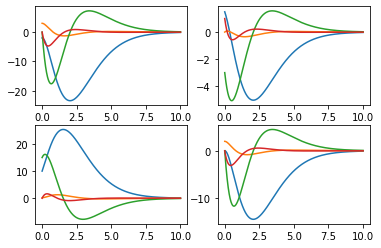

In [10]:
from scipy.integrate import *
import matplotlib.pyplot as plt


def subplot(pos, t, res):
    plt.subplot(pos)
    res = res.T
    for i in range(len(res)):
        plt.plot(t, res[i], label="test")

K = place_poles(A, B, [-1, -1.2, -1.3, -1.4]).gain_matrix 
A_cl = A - B.dot(K)
np.linalg.eig(A_cl)[0]

t = np.linspace(0, 10, 1000)

def df(x, t):
    x = np.array(x).reshape(4, 1)
    return list(np.matmul(A_cl, x).T[0])
res1 = odeint(df, [-2, 3, 0, 0], t)
res2 = odeint(df, [1.5, 0, -3, 1], t)
res3 = odeint(df, [10, 0.2, 15, 0], t)
res4 = odeint(df, [0, 2, 0, 0], t)

subplot(221, t, res1)
subplot(222, t, res2)
subplot(223, t, res3)
subplot(224, t, res4)
plt.show()

## Task E

For this task (F and G) I used Simulink (you can find schemes in the project files). Note, that you need to load variables into your simulink work space. The function blok is nonlinear system (I just took 2nd part of the previous homework). Matrix L is taken from the previous task (Pole placement).
<img src="images/E_1.png" style="height=50%;width:50%"/>

<img src="images/E_2.png" style="height=100%;width:100%"/>
Error dynamics (for input 1). As you can see it goes to 0 even if the observer did not know the initial state.


### Input 1 ([0.1; 0; 0; 0]) - Controlled System
<img src="images/E_3.png" style="height=70%;width:70%"/>

### Input 2 ([0; 0.2; 0; 0]) - Controlled System
<img src="images/E_4.png" style="height=70%;width:70%"/>

### Input 3 ([-0.13; 0.1; 0; 0]) - Controlled System
<img src="images/E_5.png" style="height=70%;width:70%"/>

As you can see, the system is stabilizing even on observer-based feedback controller. That means that the Luenberger observer is very powerful even for such tasks. Also the most fascinating fact is that the system that is used by Luenberger observer is linear. 

## Task F

<img src="images/E_7.png" style="height=60%;width:60%"/>
As you can see, I added awgn block to the system with parameters (initial seed: 34, variance: 0.01). In this case the system is not able to be stabilized since the observer gets wrong information and the controller sends wrong signals there. An example is below.

### Input 3 ([-0.13; 0.1; 0; 0]) - System with WGN on the output
<img src="images/E_6.png" style="height=70%;width:70%"/>

## Task G
I solved this task for two cases.
### You meant adding noise to the linearized system dynamics
<img src="images/F_1.png" style="height=60%;width:60%"/>
I used the parameters for WGN - 34, 0.0001.

#### Input 3 ([-0.13; 0.1; 0; 0])
Error dynamics
<img src="images/F_2.png" style="height=70%;width:70%"/>

Controlled system dynamics
<img src="images/F_3.png" style="height=70%;width:70%"/>

As you can see, the system does not break too much with small variance and the controller make the system stable in some kind of "sense of Lyapunov" but it does not go somewhere in non stable positions (infinite).
With bigger variances the system will have bigger amplitude but still be more or less stable but physically it is not possible since there are limitations on torque for example). ALso it is important to mention that the system cares about its theta position more than about its x position.

#### Input 3 ([-0.13; 0.1; 0; 0])

Error dynamics
<img src="images/F_4.png" style="height=70%;width:70%"/>

Controlled system dynamics
<img src="images/F_5.png" style="height=70%;width:70%"/>
_The same comments are applied here._

## Task H (Kalman filter implementation)
For this task I used Python and Numpy library. All the explanations are in the code comments. <br/>
I read Wikipedia article (https://en.wikipedia.org/wiki/Kalman_filter) and used their approach for algorithm.

In [65]:
def predict(F, B, P, Q, x, u):
    # a priori state estimate
    x = F.dot(x) + B.dot(u)
    # a priori covariance estimate
    P = F.dot(P).dot(F.T) + Q
    return x, P

def update(x, P, z, H, R):
    y = z - H.dot(x)
    S = H.dot(P).dot(H.T) + R
    # kalman gain
    K = P.dot(H.T).dot(np.linalg.inv(S))
    # a posteriori state estimate
    x = x + K.dot(y)
    # a posteriori covariance estimate
    temp = K.dot(H)
    P = (np.eye(temp.shape[0]) - temp).dot(P)
    y = z - H.dot(x)
    return x, y, P, S, K

def kalman_filter(states, iterations, F, B, P, Q, R, inputs, H):
    states = states.reshape(-1, 4, 1)
    predicted = np.empty((iterations, states[0].shape[0], 1))
    predicted[0] = states[0].reshape(4, 1)
    x = predicted[0]
    for i in range(iterations - 1):
        (x, P) = predict(F, B, P, Q, x, inputs[i + 1])
        #print(x)
        (x, y, P, S, K) = update(x, P, states[i + 1], H, R)
        #print(x)
        predicted[i + 1] = x
        
    return predicted

## Task I
Here I use controlled inverted pendulum system. It was made discrete using matlab function **c2d**. You can find the matlab code in files.

In [170]:
from numpy.random import *
from matplotlib import pyplot as plt

A = np.array([[1.0103,    0.2175,   -0.3413,   -0.0693],
         [0.1050,    1.1781,   -3.4268,   -0.6845],
         [0.0279,    0.0474,    0.6062,    0.0463],
         [0.3064,    0.5198,   -4.2887,   -0.4795]])

B = np.array([[0.0368],
    [0.3740],
    [0.0996],
    [1.0917]])

P = np.diag((0.01, 0.01, 0.01, 0.01))
Q = np.eye(4) * 0
R = np.eye(4) 
H = np.eye(4)

def test(iterations = 30, init=[0.2, 3, 1, 0.3]):
    states = np.empty((iterations, 4))
    real = np.empty((iterations, 4))
    states[0] = init
    real[0] = init
    inputs = np.zeros(iterations)
    for i in range(iterations - 1):
        real[i + 1] = A.dot(real[i]) + abs(0.0 * randn(4))
        states[i + 1] = abs(0.05 * randn(4)) + A.dot(real[i])

    predicted = kalman_filter(states, iterations, A, B, P, Q, R, inputs, H).reshape(iterations, 4)


    t = np.linspace(0, iterations * 0.2, iterations)
    plt.plot(predicted.T[0].T, predicted.T[2].T, label="Predicted")
    plt.plot(real.T[0].T, real.T[2].T, label="Real")
    plt.scatter(states.T[0].T, states.T[2].T, s=3, color='red', label="Got")
    plt.legend()
    plt.xlabel("$x$")
    plt.ylabel("$\theta$")

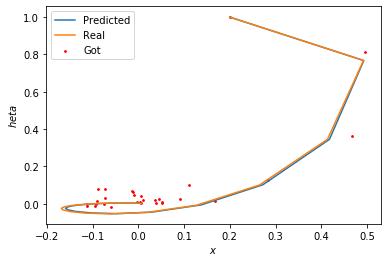

In [171]:
test()

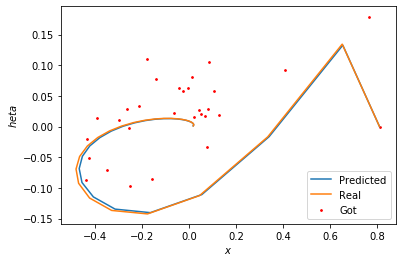

In [172]:
test(init=[ 0.81084115, 0, 0,  2.41504627])

As you can see, the Filter works perfectly!! I assumed that there is no noise in the system, only output noise.

## Task J